# Import bibliotek

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

C:\Users\klips\AppData\Local\Temp\ipykernel_39112\4164267714.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Wybranie datasetu i podział na zbiory

In [2]:
def choose_dataset(train_data, test_data):
    train_data = train_data
    test_data = test_data
    return train_data, test_data

In [3]:
x = pd.read_csv("data/data2008.csv")
y = pd.read_csv('data/data2009.csv')

In [4]:
if (len(x)) > len(y):
    x = x[:len(y)]
else:
    y = y[:len(x)]

# Sprawdzenie istnienia brakujących wartości

In [5]:
x = x[x["RainTomorrow"].notna()]
y = y[y["RainTomorrow"].notna()]

# Wyświetl wartości kategoryczne i liczbowe

In [6]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [7]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Latitude',
 'Longitude',
 'Year',
 'Month',
 'Day']

# Odrzucanie wartości wysoce skorelowanych

In [8]:
x = x.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)
y = y.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)

In [9]:
x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday',
       'RainTomorrow', 'Latitude', 'Longitude', 'Year', 'Month', 'Day'],
      dtype='object')

# Podział danych

In [10]:
X = x.drop(['RainTomorrow'], axis=1)

y = y['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1816, 18), (454, 18))

# Zakodowanie zmiennej RainToday

In [12]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Utworzenie zbioru treningowego.

In [13]:
print(X_train.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday_0',
       'RainToday_1', 'Latitude', 'Longitude', 'Year', 'Month', 'Day'],
      dtype='object')


In [15]:
numerical = [col for col in numerical if col not in ['Humidity9am', 'Temp9am', 'Temp3pm']]

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

# Utworzenie zbioru testowego.

In [17]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.WindGustDir),
                    pd.get_dummies(X_test.WindDir9am),
                    pd.get_dummies(X_test.WindDir3pm),], axis=1)

In [18]:
cols = X_train.columns

In [19]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [21]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Trenowanie modelu

In [22]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Kodowanie zmiennych kategorycznych

In [23]:
'''from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])
cleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])
cleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])
cleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])
'''

"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\ncleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])\ncleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])\ncleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])\ncleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])\n"

In [24]:
X_train.columns

MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity3pm',),
            (  'Pressure9am',),
            (  'Pressure3pm',),
            (     'Latitude',),
            (    'Longitude',),
            (         'Year',),
            (        'Month',),
            (          'Day',),
            (  'RainToday_0',),
            (  'RainToday_1',),
            (            'E',),
            (          'ENE',),
            (          'ESE',),
            (            'N',),
            (           'NE',),
            (          'NNE',),
            (          'NNW',),
            (           'NW',),
            (            'S',),
            (           'SE',),
            (          'SSE',),
            (          'SSW',),
            (           'SW',),
            (            'W',),
            (          'WNW',),
        

# Predykcja wyników

In [25]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [26]:
logreg.predict_proba(X_test)[:, 0]

array([0.76415543, 0.69162882, 0.73969003, 0.90607424, 0.71887181,
       0.92389735, 0.64108283, 0.82811702, 0.85219489, 0.84758857,
       0.82852919, 0.81814671, 0.7463349 , 0.75875376, 0.82718575,
       0.80097859, 0.85562289, 0.8461447 , 0.91791631, 0.82354306,
       0.90143444, 0.80184217, 0.8580596 , 0.89029318, 0.84580475,
       0.83241073, 0.83980137, 0.73061277, 0.85475345, 0.7740381 ,
       0.7542985 , 0.76400063, 0.89353528, 0.87352451, 0.80992999,
       0.89013735, 0.89172718, 0.77138211, 0.69589067, 0.76440283,
       0.70342194, 0.80504984, 0.8517799 , 0.7294333 , 0.94440521,
       0.86361188, 0.73321876, 0.63011126, 0.78885807, 0.75016951,
       0.85181938, 0.80251902, 0.79487731, 0.77701859, 0.67453455,
       0.7513362 , 0.82573743, 0.82833535, 0.82738419, 0.62909854,
       0.76894385, 0.88528978, 0.83426852, 0.76600156, 0.90439108,
       0.88448313, 0.88582377, 0.71980733, 0.81481788, 0.94163799,
       0.54972781, 0.69180517, 0.89190193, 0.92012964, 0.91515

In [27]:
logreg.predict_proba(X_test)[:, 1]

array([0.23584457, 0.30837118, 0.26030997, 0.09392576, 0.28112819,
       0.07610265, 0.35891717, 0.17188298, 0.14780511, 0.15241143,
       0.17147081, 0.18185329, 0.2536651 , 0.24124624, 0.17281425,
       0.19902141, 0.14437711, 0.1538553 , 0.08208369, 0.17645694,
       0.09856556, 0.19815783, 0.1419404 , 0.10970682, 0.15419525,
       0.16758927, 0.16019863, 0.26938723, 0.14524655, 0.2259619 ,
       0.2457015 , 0.23599937, 0.10646472, 0.12647549, 0.19007001,
       0.10986265, 0.10827282, 0.22861789, 0.30410933, 0.23559717,
       0.29657806, 0.19495016, 0.1482201 , 0.2705667 , 0.05559479,
       0.13638812, 0.26678124, 0.36988874, 0.21114193, 0.24983049,
       0.14818062, 0.19748098, 0.20512269, 0.22298141, 0.32546545,
       0.2486638 , 0.17426257, 0.17166465, 0.17261581, 0.37090146,
       0.23105615, 0.11471022, 0.16573148, 0.23399844, 0.09560892,
       0.11551687, 0.11417623, 0.28019267, 0.18518212, 0.05836201,
       0.45027219, 0.30819483, 0.10809807, 0.07987036, 0.08484

# Dokładność

In [28]:
print('Model accuracy score: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8238


# Macierz pomyłek

In [29]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[374   0]
 [ 80   0]]

True Positives(TP) =  374

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  80


# Wizualizacja macierzy pomyłek z heatmapą seaborn


<Axes: >

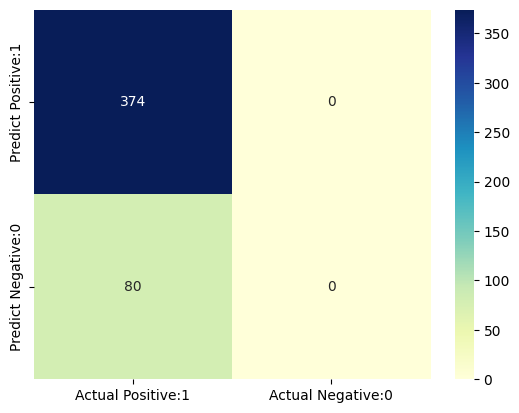

In [30]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Dokładność klasyfikatora


In [31]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8238


# Precyzja klasyfikatora

In [32]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [33]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

# Krzywa ROC

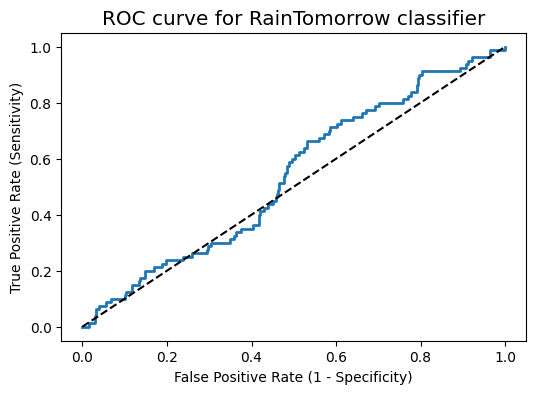

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Eskport modelu

In [35]:
filename = "model.h5"
pickle.dump(logreg, open(filename, 'wb'))
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)



In [36]:
total_features = len(numerical) - len(['Temp3pm', 'Temp9am', 'Humidity9am'])
total_features += 2
total_features += sum([len(x[column].unique()) for column in categorical])
print(total_features)

65
